In [ ]:
'''
This script takes in the output from change_letter_to_type.ipynb and cuts off any diagonal portions due to 
the natural structure of that particular structure exported from CrystalMaker. A common example is crystaline quartz. 

Input: .lmp file from change_letter_to_type.ipynb with columns ID Type x y z
Output: .txt file with columns ID Type x y z

@author: kmream
'''

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
input_file = pd.read_csv('test_cutting_gold.lmp.txt', sep = " ")
input_file.columns = ['ID', 'Type', 'x', 'y', 'z']
input_file

,ID,Type,x,y,z
0,1,1,20.3930,-8.1572,-8.1572
1,2,1,20.3930,-6.1179,-6.1179
2,3,1,20.3930,-8.1572,-4.0786
3,4,1,20.3930,-6.1179,-2.0393
4,5,1,20.3930,-8.1572,0.0000
...,...,...,...,...,...
903,904,1,0.0000,0.0000,4.0786
904,905,1,2.0393,2.0393,4.0786
905,906,1,4.0786,0.0000,4.0786
906,907,1,0.0000,4.0786,4.0786


Text(0, 0.5, 'Z (angstroms)')

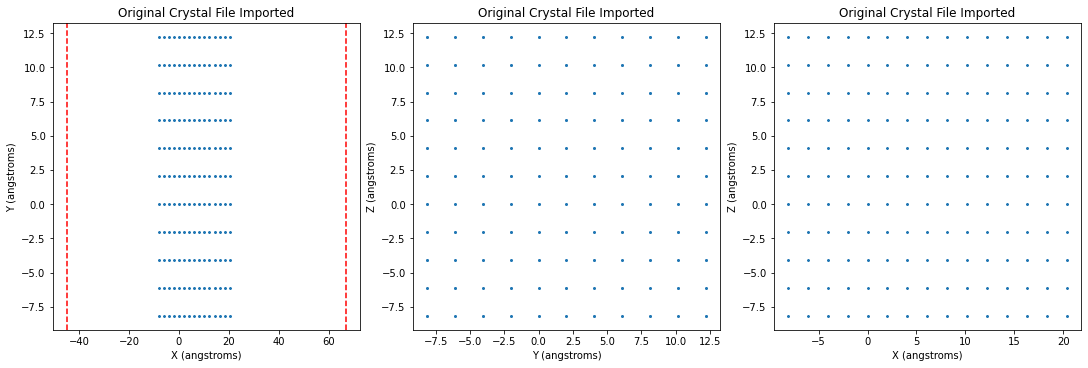

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

axes[0].scatter(input_file['x'].values, input_file['y'].values, s = 5, marker = '.')
axes[0].set_title('Original Crystal File Imported')
axes[0].set_xlabel('X (angstroms)')
axes[0].set_ylabel('Y (angstroms)')

axes[1].scatter(input_file['y'].values, input_file['z'].values, s = 5, marker = '.')
axes[1].set_title('Original Crystal File Imported')
axes[1].set_xlabel('Y (angstroms)')
axes[1].set_ylabel('Z (angstroms)')

axes[2].scatter(input_file['x'].values, input_file['z'].values, s = 5, marker = '.')
axes[2].set_title('Original Crystal File Imported')
axes[2].set_xlabel('X (angstroms)')
axes[2].set_ylabel('Z (angstroms)')

## Determine which axis (or axes) require chopping and modify the function below accordingly.

In [10]:
'''
currently this function is written with a diagonal present in the x-axis: if it exists in y or z, 
modify the variable names to be ymin, ymax or zmin, zmax respectively
'''
def cutoff(data, xmin, xmax):
    data_new = data[(data['x'] > xmin) & (data['x'] < xmax)]
    #data_new = data_new[(data_new['y'] > -60) & (data_new['y'] < 60)] #if desired cut more in straight planes
    #data_new = data_new[(data_new['z'] > -100) & (data_new['z'] < 110)] #if desired cut more in straight planes
    return data_new

data = cutoff(input_file, x_min, x_max)

Text(0, 0.5, 'Z (angstroms)')

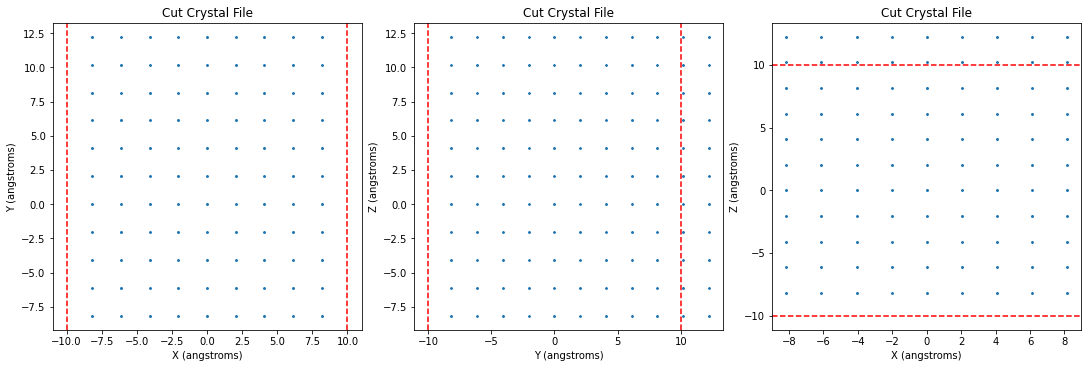

In [11]:
x_min, x_max, y_min, y_max, z_min, z_max = -10, 10, -10, 10, -10, 10

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

axes[0].scatter(data['x'].values, data['y'].values, s = 5, marker = '.')
axes[0].axvline(x = x_min, color='r', linestyle='--')
axes[0].axvline(x = x_max, color='r', linestyle='--')
axes[0].set_title('Cut Crystal File')
axes[0].set_xlabel('X (angstroms)')
axes[0].set_ylabel('Y (angstroms)')

axes[1].scatter(data['y'].values, data['z'].values, s = 5, marker = '.')
axes[1].axvline(x = y_min, color='r', linestyle='--')
axes[1].axvline(x = y_max, color='r', linestyle='--')
axes[1].set_title('Cut Crystal File')
axes[1].set_xlabel('Y (angstroms)')
axes[1].set_ylabel('Z (angstroms)')

axes[2].scatter(data['x'].values, data['z'].values, s = 5, marker = '.')
axes[2].axhline(y = z_min, color='r', linestyle='--')
axes[2].axhline(y = z_max, color='r', linestyle='--')
axes[2].set_title('Cut Crystal File')
axes[2].set_xlabel('X (angstroms)')
axes[2].set_ylabel('Z (angstroms)')

## Save the data to a new text file.

In [15]:
data = data.reset_index(drop=True)
data['ID'] = data.index + 1
data['charge'] = data['charge'].astype(float)
data.loc[data['type'] == 1, 'charge'] = 1.0
data.loc[data['type'] == 2, 'charge'] = -0.5

data.to_csv("cubed_quartz.txt", sep=" ", index=False)
print(len(data))
data

223021


,ID,type,charge,x,y,z
0,1,2,-0.5,-40.981487,-58.953735,-98.444085
1,2,2,-0.5,-43.925776,-57.816695,-99.728241
2,3,2,-0.5,-43.438337,-54.698346,-98.444085
3,4,2,-0.5,-36.067787,-58.953735,-98.444085
4,5,2,-0.5,-39.012076,-57.816695,-99.728241
...,...,...,...,...,...,...
223016,223017,1,1.0,7.221666,8.510778,16.214099
223017,223018,1,1.0,6.216568,10.767412,18.015666
223018,223019,1,1.0,-5.062585,12.766167,16.214099
223019,223020,1,1.0,-0.148885,12.766167,16.214099
